# Testing by X

In [1]:
%matplotlib inline

from importlib import reload
import os
import numpy as np

import pandas

import h5py
import seaborn as sns
import pandas as pd
import umap
from ulmo import io as ulmo_io
from ulmo import plotting

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt
from tqdm import trange

# Load up the SSL latents

In [2]:
### Load train latents from s3
latents_last_file = 's3://modis-l2/modis_latents_simclr/MODIS_2010_train_last.h5'
latents_last = ulmo_io.load_to_bytes(latents_last_file)
#
with h5py.File(latents_last, 'r') as file:
    print(file.keys())
    latents_last = file['modis_latents'][:]

<KeysViewHDF5 ['modis_latents']>


In [3]:
latents_last.shape

(135712, 128)

# Ulmo

## No regularization

In [4]:
%%time
reducer_umap = umap.UMAP()
latents_embedding = reducer_umap.fit_transform(latents_last)

CPU times: user 1h 15min 22s, sys: 25min 29s, total: 1h 40min 52s
Wall time: 6min 40s


In [5]:
latents_embedding.shape

(135712, 2)

In [6]:
%%time
reducer_umap = umap.UMAP()
latents_mapping = reducer_umap.fit(latents_last)

CPU times: user 59min 53s, sys: 19min 40s, total: 1h 19min 33s
Wall time: 5min 15s


### Plot

<AxesSubplot:>

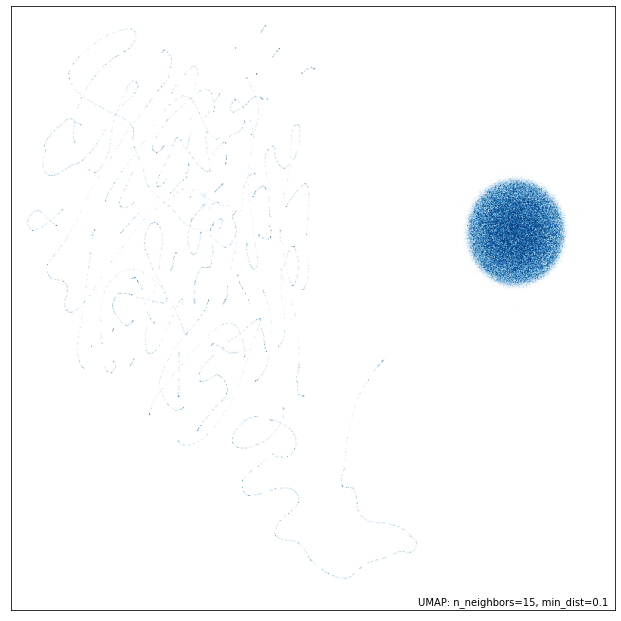

In [9]:
import umap.plot
umap.plot.points(latents_mapping)

## Regularize

In [10]:
### Initialize the linear transformer at first
scaler = StandardScaler()
### Estimate the parameters
scaler.fit(latents_last)
### Transform the latents
latents_std = scaler.transform(latents_last)

In [ ]:
%%time
reducer_umap = umap.UMAP()
latents_embedding2 = reducer_umap.fit_transform(latents_std)

In [ ]:
%%time
reducer_umap = umap.UMAP()
latents_mapping2 = reducer_umap.fit(latents_std)

In [ ]:
umap.plot.points(latents_mapping2)